# Pytorch Tutorial

Reference:
[**PyTorch Tutorials**](http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)

***

基本的に，PyTorch初心者向けの公式ドキュメントに記載してあるコードを動かしたものです。公式ドキュメントには，以下の５つのチュートリアルがあり，一応60分で全体をさらうことができるみたいです。

![https://i.imgur.com/tlEbPbZ.png](https://i.imgur.com/tlEbPbZ.png)

このノートは，公式ドキュメントに公開されているチュートリアルのうち，最初の２つ：
- What is PyTorch?
- Autograd: automatic differentiation

の日本語訳と，適宜説明を追加しています。


## PyTorchとは

- 深層学習研究のプラットフォーム
- numpyよりも優れた，GPU上での計算の仕組みを提供する

## はじめに

### Tensors

PyTorchの基本は`torch.Tensor`に含まれる`Tensor`型。

`Tensor`は`numpy.ndarray`に似ているが，`Tensor`はGPU上での計算において優れた型である。
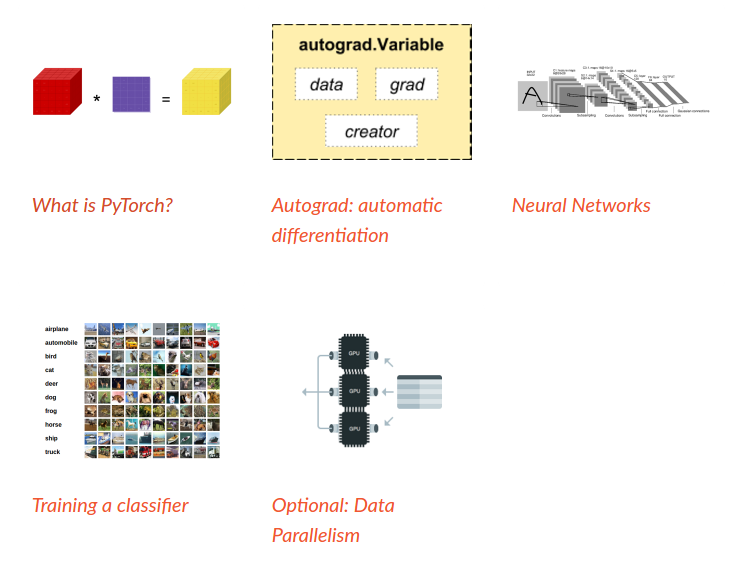

In [5]:
from __future__ import print_function
import torch

***
初期化されていない（5, 3）行列を`Tensor`型で宣言すると：

In [6]:
x = torch.Tensor(5, 3)
x


-1.9742e-22  4.5800e-41  4.0313e+05
 3.0777e-41  1.6255e-43  1.5554e-43
 1.5975e-43  1.3873e-43  1.4574e-43
 6.4460e-44  1.5975e-43  1.3593e-43
 1.5414e-43  1.4013e-43  1.5414e-43
[torch.FloatTensor of size 5x3]

***
乱数で初期化した（5, 3）行列を`Tensor`型で宣言すると

In [7]:
x = torch.rand(5, 3)
x


 0.3983  0.2964  0.2377
 0.9519  0.3093  0.3955
 0.4799  0.2055  0.6707
 0.8251  0.8141  0.7262
 0.9655  0.8692  0.6213
[torch.FloatTensor of size 5x3]

***
サイズの確認は：

In [8]:
x.size()

torch.Size([5, 3])

***

### Operations：演算

四則演算について，様々な表記がある。

例えば,加算についてみていく。

加算方法１：

In [9]:
y = torch.rand(5, 3)
x + y


 0.6591  0.3766  1.1684
 1.8462  0.7029  0.9779
 1.4392  0.5668  0.9335
 1.1356  1.1658  0.9240
 1.8273  1.0639  1.0738
[torch.FloatTensor of size 5x3]

***
加算方法２：

In [10]:
print(x + y)


 0.6591  0.3766  1.1684
 1.8462  0.7029  0.9779
 1.4392  0.5668  0.9335
 1.1356  1.1658  0.9240
 1.8273  1.0639  1.0738
[torch.FloatTensor of size 5x3]



***
加算方法３：

In [11]:
result = torch.Tensor(5, 3)      # make empty (5, 3) Tensor
torch.add(x, y, out = result)    # input x + y to Tensor
result


 0.6591  0.3766  1.1684
 1.8462  0.7029  0.9779
 1.4392  0.5668  0.9335
 1.1356  1.1658  0.9240
 1.8273  1.0639  1.0738
[torch.FloatTensor of size 5x3]

***
加算方法４：

In [12]:
y.add_(x)     # "add_(x)" -> y = y + x 
y


 0.6591  0.3766  1.1684
 1.8462  0.7029  0.9779
 1.4392  0.5668  0.9335
 1.1356  1.1658  0.9240
 1.8273  1.0639  1.0738
[torch.FloatTensor of size 5x3]

### Note
基本的に，演算の関数の後に `_` がついているものは代入の操作を表す。
上記の例では，
```Python
y.add_(x)
```
は，`y = y+x`を行うことと同じ。
***

`numpy`と同じように，次のようにインデックスを指定できる。

In [13]:
x[:, 1]


 0.2964
 0.3093
 0.2055
 0.8141
 0.8692
[torch.FloatTensor of size 5]

### あとで読みたい
`Tensor`の演算は他にも，インデックス，スライス，線形代数の演算などが100以上ある。詳細は[こちら](http://pytorch.org/docs/torch)。

***

## `Torch.Tensor`と`numpy`を行ったり来たり

`Torch.Tensor`と`numpy`の要素は，同じメモリの場所に格納されており，相互の変換は簡単にできる。

### `numpy`への変換

In [14]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [15]:
b = a.numpy()
b

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

***
ここで，面白いことに…

In [16]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


***
### `torch.Tensor`に変換

In [17]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



CPU上の`Tensor`は，全て`numpy`に変換できるらしい（GPU上のTensorは変換できないということだろうか）。

## `autograd`と`Variable`

Autogradは”automatic differentiation”のことで，そのパッケージである`autograd`はPyTorchの中核を担っている。これから，`autograd`に少し触れてみて，それをもとにニューラルネットワークを学習させてみよう。

`autograd`パッケージは，Tensorの全ての演算に対して自動微分を行うためのもの。これは，PyTorchの特徴である"define-by-run"を実現している。つまり，順伝播のコードを書くだけで逆伝播が定義できる。

### `Variable`

- `autograd.Variable`が，`autograd`の中心的なパッケージである。`Variable`は`Tensor`のラッパーであり，`Tensor`のほぼ全ての演算が含まれている。
- ネットワークを定義してしまえば，`.backward()`を呼び出すだけで勾配計算を自動的に行うことができる。

Tensorの生データには`.data`でアクセスできる。そして，`Variable`に関する勾配は`.grad`に蓄積されている。`Variable`の概念図を以下に示す。

![概念図](http://pytorch.org/tutorials/_images/Variable.png)

### `Function`

autogradに関して，もうひとつ重要なクラスがあります。それは`Function`と呼ばれるパッケージです。
`Variable`と`Function`は内部でつながっていて，この２つによってニューラルネットワークのグラフが構築されます。そしてこのグラフに，ニューラルネットの計算の全ての履歴が残ります。

生成されたvariableのそれぞれに`.grad_fn`という属性があり，この属性によってどの`Function`によってvariableが生成されたのかを参照できる。ただし，ユーザによって作られたvariableの場合`grad_fn`は`None`となる。

variableの導関数を計算したいのであれば，variableがもっている`.backward()`を呼び出すと良い。もしvariableが単一の要素だけのとき，`backward()`には特に引数を指定する必要はないが，複数の要素をもつときは引数`grad_output`を指定してやる必要がある（←どういうこと？）。

と言っても分かりづらいので，具体例を交えながら見ていきましょう。

***

In [18]:
import torch
from torch.autograd import Variable

***
variableを作ってみます：

In [19]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

***
次に，variableの加算をしてみましょう：

In [20]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

***
さっき言ったように，何らかの演算の後に生成されたvariableには属性`grad_fn`が付与されます。`y`の`grad_fn`を参照してみると：

In [21]:
y.grad_fn

***
`y`にもっと色んな演算をしていきます：

In [22]:
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



***
## 勾配計算

いよいよ逆伝播の計算です。
次に行う`out.backward()`は，`out.backward(torch.tensor([1.0]))`と等価です。

In [23]:
out.backward()

***
勾配を出力してみましょう。勾配とはすなわち $\frac{d({\rm out})}{dx}$　のことです。

In [24]:
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

`4.5`の要素をもつ行列（テンソル）が得られました。これはどういうことなのでしょうか。

`out` Variable を"$o$"とします。$o$は，`out = z.mean()`で定義したので，次式で得られます。

$o = \frac{1}{4}\sum_i z_i$

ここで，$z_i = 3(x_i + 2)^2$ですから，

$\frac{\partial o}{\partial x_i}=\frac{3}{2}(x_i + 2)$

$x_i$の各要素は$1$なので，


$\frac{\partial o}{\partial x_i}|_{x_i = 1} = 4.5$

確かに，Variableには過去の計算の履歴が残っていましたね！

***

### autogradを使えば，もっとクレイジーなことができる！

In [25]:
import torch
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
-1453.1710
  229.0913
  -37.1547
[torch.FloatTensor of size 3]



In [26]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  51.2000
 512.0000
   0.0512
[torch.FloatTensor of size 3]



この上記の操作は何を意味しているのでしょうか…？（疑問）

***

